<a href="https://colab.research.google.com/github/devansh207/Datasets/blob/master/Stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [7]:
from google.colab import files
files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


{'Google_Stock_Price_Train.csv': b'Date,Open,High,Low,Close,Volume\r\n1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"\r\n1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"\r\n1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"\r\n1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"\r\n1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"\r\n1/10/2012,313.7,315.72,307.3,621.43,"8,824,000"\r\n1/11/2012,310.59,313.52,309.4,624.25,"4,817,800"\r\n1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"\r\n1/13/2012,311.96,312.3,309.37,623.28,"4,631,800"\r\n1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"\r\n1/18/2012,312.14,315.82,309.9,631.18,"5,544,000"\r\n1/19/2012,319.3,319.3,314.55,637.82,"12,657,800"\r\n1/20/2012,294.16,294.4,289.76,584.39,"21,231,800"\r\n1/23/2012,291.91,293.23,290.49,583.92,"6,851,300"\r\n1/24/2012,292.07,292.74,287.92,579.34,"6,134,400"\r\n1/25/2012,287.68,288.27,282.13,567.93,"10,012,700"\r\n1/26/2012,284.92,286.17,281.22,566.54,"6,476,500"\r\n1/27/2012,284.32,289.08,283.6,578.39,"

In [9]:
data=pd.read_csv('Google_Stock_Price_Train.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [15]:
train = data.iloc[:, 1:2].values

In [10]:
from google.colab import files
files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


{'Google_Stock_Price_Test.csv': b'Date,Open,High,Low,Close,Volume\r\n1/3/2017,778.81,789.63,775.8,786.14,"1,657,300"\r\n1/4/2017,788.36,791.34,783.16,786.9,"1,073,000"\r\n1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"\r\n1/6/2017,795.26,807.9,792.2,806.15,"1,640,200"\r\n1/9/2017,806.4,809.97,802.83,806.65,"1,272,400"\r\n1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"\r\n1/11/2017,805,808.15,801.37,807.91,"1,065,900"\r\n1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"\r\n1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"\r\n1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"\r\n1/18/2017,805.81,806.21,800.99,806.07,"1,294,400"\r\n1/19/2017,805.12,809.48,801.8,802.17,"919,300"\r\n1/20/2017,806.91,806.91,801.69,805.02,"1,670,000"\r\n1/23/2017,807.25,820.87,803.74,819.31,"1,963,600"\r\n1/24/2017,822.3,825.9,817.82,823.87,"1,474,000"\r\n1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"\r\n1/26/2017,837.81,838,827.01,832.15,"2,973,900"\r\n1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"\r

In [26]:
data_test=pd.read_csv('Google_Stock_Price_Test.csv')
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [16]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train = sc.fit_transform(train)

In [17]:
train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [18]:
X_train = train[0:-1]
y_train = train[1:]

In [19]:
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [21]:
regressor = Sequential()

In [22]:
# Input layer
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))

In [23]:
#  output layer
regressor.add(Dense(units=1))

In [24]:
#Compile
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1551
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1144
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0965
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0899
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0868
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0847
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0825
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0802
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0780
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0758
Epoch 11/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0736
Epoch 12/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0714
Epoch 13/200
40/40 [=================

In [25]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [27]:
real_stock_price = data_test.iloc[:, 1:2].values

In [28]:
test = real_stock_price
test = sc.transform(test)
test = np.reshape(test, (20, 1, 1))
predicted_stock_price = regressor.predict(test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


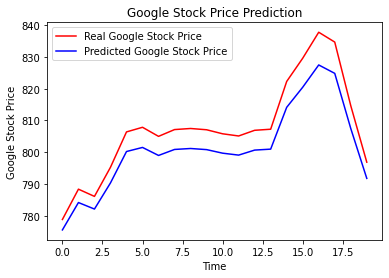

In [29]:
# Visualising the results
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()